In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv

nfl_data_path = "output_data/nfl.csv"

nfl_data = pd.read_csv(nfl_data_path, encoding="latin1")

nfl_data

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,BAL,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,SEA,SEA,-3.5,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,CIN,CHI,-3.0,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,MIA,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,13511,1/22/2023,2022,Division,True,BUF,10,27,CIN,BUF,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2703,13512,1/22/2023,2022,Division,True,SF,19,12,DAL,SF,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2704,13513,1/29/2023,2022,Conference,True,KC,23,20,CIN,KC,-1.5,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2705,13514,1/29/2023,2022,Conference,True,PHI,31,7,SF,PHI,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [6]:
nfl_data.isnull().sum()

Unnamed: 0                0
schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     704
weather_wind_mph        705
weather_humidity       2441
weather_detail         1861
dtype: int64

In [13]:
teams = nfl_data["team_home"].value_counts() 

<Axes: >

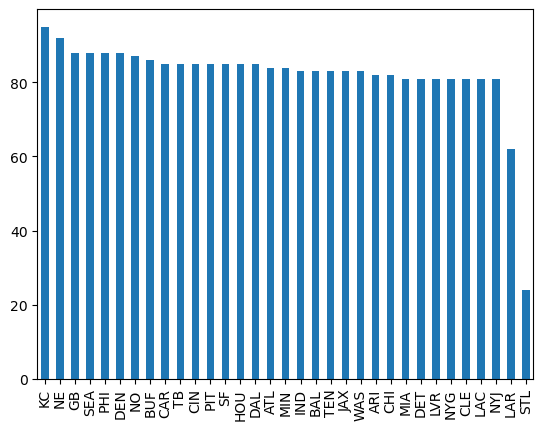

In [14]:
teams.plot(kind="bar")

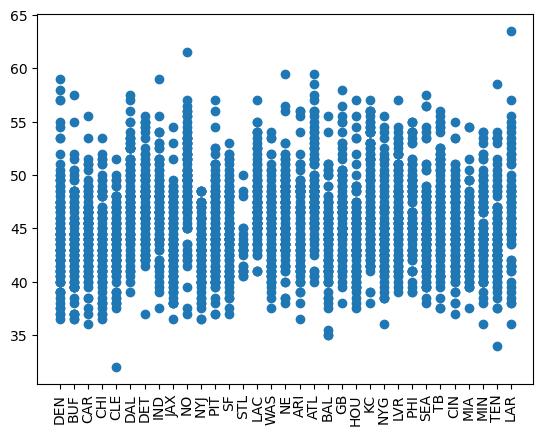

In [19]:
x = nfl_data["team_home"]
y = nfl_data["over_under_line"]

plt.scatter(x, y)
plt.xticks(rotation=90)

plt.savefig("images/overunderscatterall.png")
plt.show()

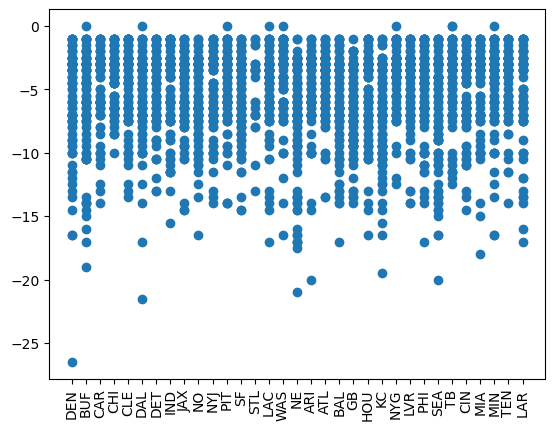

In [20]:
x = nfl_data["team_home"]
y = nfl_data["spread_favorite"]

plt.scatter(x, y)
plt.xticks(rotation=90)

plt.show()

In [8]:
NE_df = nfl_data[(nfl_data["team_home"]=="NE")|(nfl_data["team_away"]=="NE")]

NE_df

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
16,10825,9/12/2013,2013,2,False,NE,13,10,NYJ,NE,-11.5,43.5,Gillette Stadium,False,72.0,8.0,89.0,rain | fog
39,10848,9/22/2013,2013,3,False,NE,23,3,TB,NE,-7.5,45.0,Gillette Stadium,False,72.0,9.0,72.0,NaN
49,10858,9/29/2013,2013,4,False,ATL,23,30,NE,ATL,-3.0,50.0,Georgia Dome,False,72.0,0.0,NaN,indoor
66,10875,10/6/2013,2013,5,False,CIN,13,6,NE,NE,-1.0,45.5,Paul Brown Stadium,False,74.0,7.0,93.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,13439,12/12/2022,2022,14,False,ARI,13,27,NE,NE,-2.5,44.0,State Farm Stadium,False,NaN,NaN,NaN,NaN
2640,13449,12/18/2022,2022,15,False,LVR,30,24,NE,LVR,-2.5,45.5,Allegiant Stadium,False,72.0,0.0,NaN,indoor
2655,13464,12/24/2022,2022,16,False,NE,18,22,CIN,CIN,-3.0,41.5,Gillette Stadium,False,NaN,NaN,NaN,NaN
2672,13481,1/1/2023,2022,17,False,NE,23,21,MIA,NE,-3.0,41.5,Gillette Stadium,False,NaN,NaN,NaN,NaN


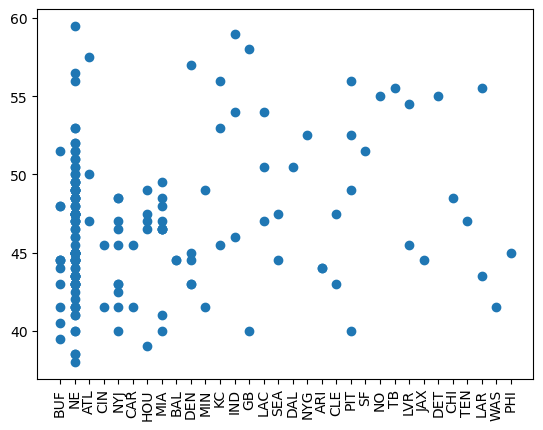

In [18]:
x = NE_df["team_home"]
y = NE_df["over_under_line"]

plt.scatter(x, y)
plt.xticks(rotation=90)

plt.show()